In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df=pd.read_csv('emotion-labels-train.csv')
df.head()

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy


In [3]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [4]:
df.shape

(3613, 2)

In [5]:
df.label.unique()

array(['joy', 'fear', 'anger', 'sadness'], dtype=object)

In [6]:
label={'joy':0,'fear':1,'anger':2,'sadness':3}

df.label=[label[i] for i in df.label]
print(df['label'].unique())

[0 1 2 3]


In [7]:
tweets=df.copy()

In [8]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
wl=WordNetLemmatizer()
ps=PorterStemmer()
corpus=[]

for i in range(0,len(tweets)):
    process=re.sub('[^a-zA-Z]',' ',tweets['text'][i])
    process=process.lower()
    process=process.split()
    
    process=[wl.lemmatize(word) for word in process if word not in stopwords.words('english')]
    process=' '.join(process)
    corpus.append(process)

In [9]:
corpus

['got back seeing garydelaney burslem amazing face still hurt laughing much hilarious',
 'oh dear evening absolute hilarity think laughed much long time',
 'waiting week game cheer friday',
 'gardiner love thank much gloria sweet thoughtful made day joyful love',
 'feel blessed work family nanny nothing love amp appreciation make smile',
 'today reached subscriber yt goodday thankful',
 'singaholic good morning love happy first day fall let make awesome autumnmemories annabailey laughter smile',
 'bridgetjonesbaby best thing seen age funny missed bridget love teammark',
 'got back seeing garydelaney burslem amazing face still hurt laughing much',
 'indymn thought holiday could get cheerful met thenicebot',
 'still happy na blast',
 'meant happy happy',
 'yeah paul glorious bb',
 'morning started amazing hopefully whole day going want go n greatday',
 'cailamarsai whole time watching black ishabc lost glass hilarious mrbabyboogaloo',
 'iamtinadatta love much smile',
 'wyowiseguy livingv

In [10]:
# TF_IDF Vectorizer


from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000,ngram_range=(1,3))
x=tfidf.fit_transform(corpus).toarray()

In [11]:
x.shape

(3613, 3000)

In [12]:
y=tweets.label
y.shape

(3613,)

In [13]:
# split data into train and validation

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
X_train.shape

(2890, 3000)

In [15]:
X_test.shape

(723, 3000)

In [16]:
tfidf.get_feature_names()[:20]

['ab',
 'ability',
 'able',
 'abortion',
 'absolute',
 'absolutely',
 'absurd',
 'absurd could',
 'absurd could laugh',
 'abysmal',
 'acc',
 'accept',
 'accept challenge',
 'accept challenge feel',
 'access',
 'account',
 'across',
 'act',
 'acting',
 'action']

In [17]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
y_predicted=model.predict(X_test)
y_predicted[:10]

array([1, 0, 0, 1, 1, 1, 3, 3, 0, 0], dtype=int64)

Accuracy Score : 0.7980636237897649


Text(33.0, 0.5, 'y_predicted')

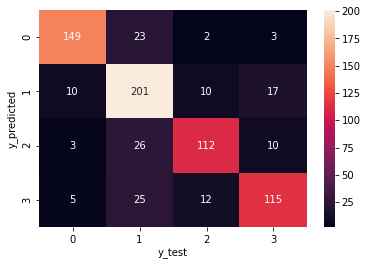

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_predicted)

sns.heatmap(cm,annot=True,fmt='d')
Score=accuracy_score(y_test,y_predicted)
print('Accuracy Score :',Score)
plt.xlabel('y_test')
plt.ylabel('y_predicted')

In [20]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       177
           1       0.73      0.84      0.78       238
           2       0.82      0.74      0.78       151
           3       0.79      0.73      0.76       157

    accuracy                           0.80       723
   macro avg       0.81      0.79      0.80       723
weighted avg       0.80      0.80      0.80       723

